In [2]:
#from the website:
#https://www.analytics-link.com/single-post/2018/09/14/Applying-the-A-Path-Finding-Algorithm-in-Python-Part-1-2D-square-grid

import heapq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

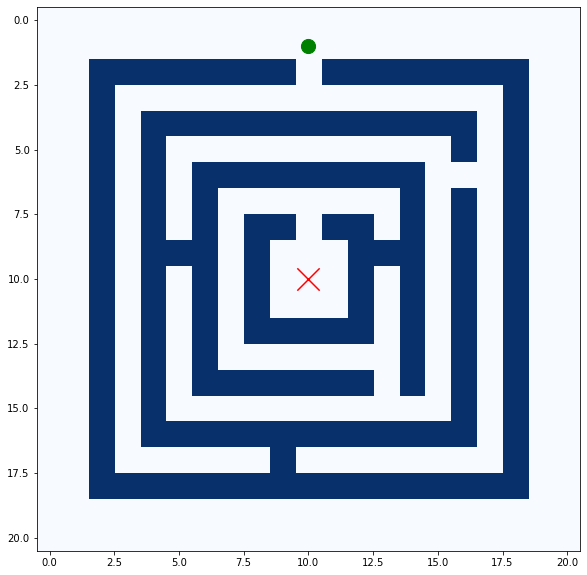

In [11]:
grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
 

# start point and goal
start = (1,10)
goal = (10, 10)
 

# plot map and path
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(grid, cmap=plt.cm.Blues)
ax.scatter(start[1],start[0], marker = 'o', color = "green", s = 200)
ax.scatter(goal[1],goal[0], marker = 'x', color = "red", s = 500)
plt.show()

In [12]:
#heuristic function
#using pythagoras theorem 
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [13]:
def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    #in order: up, down, right, left, right/up, right/down, left/up, left/down

    close_set = set() #a closed list which positions we don't have to consider anymore
    came_from = {} #route paths taken
    gscore = {start:0} #dictionary which contains g scores by iteration
    fscore = {start:heuristic(start, goal)} #dictionary which contains f scores by iteration
    oheap = [] #open list

    heapq.heappush(oheap, (fscore[start], start)) #pushing the start position and f score onto the open list
    
    while oheap: #check for available positions to move to until there are no more options left

        current = heapq.heappop(oheap)[1]
        #heapq.heappop returns the smallest item from the heap (i.e. in this case, the one with the smallest F score in our 
        #open list), and we extract element 1 which is the position

        #If we've reached the goal (i.e. our current position = the goal position -> extract and return the shortest path
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        
        #Otherwise... (i.e. we've not reached the goal)
        #Add the current position to the closed list
        close_set.add(current)
        #Loop through all the possible neighbours, calculating their G score
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            #But, if the neighbour is outside the grid (i.e. the potential neighbour is above, below, left, or 
            #right of the bounds we've set) then ignore this neighbour and continue the loop
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            #Also, if the neighbour is in the closed set and the G score is greater than the G score's for that
            #position then ignore and continue the loop
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
            
            #If the G score for the neighbour is less than the other G score's for that position OR if this neighbour is not
            #in the open list (i.e. a new, untested position) then update our lists and add to the open list    
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

route = astar(grid, start, goal)
route = route + [start] #Add start position
route = route[::-1] #Reverse the order
print(route)

[(1, 10), (2, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 17), (5, 17), (6, 16), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 14), (14, 13), (13, 12), (13, 11), (13, 10), (13, 9), (13, 8), (12, 7), (11, 7), (10, 7), (9, 7), (8, 7), (7, 8), (7, 9), (8, 10), (9, 10), (10, 10)]


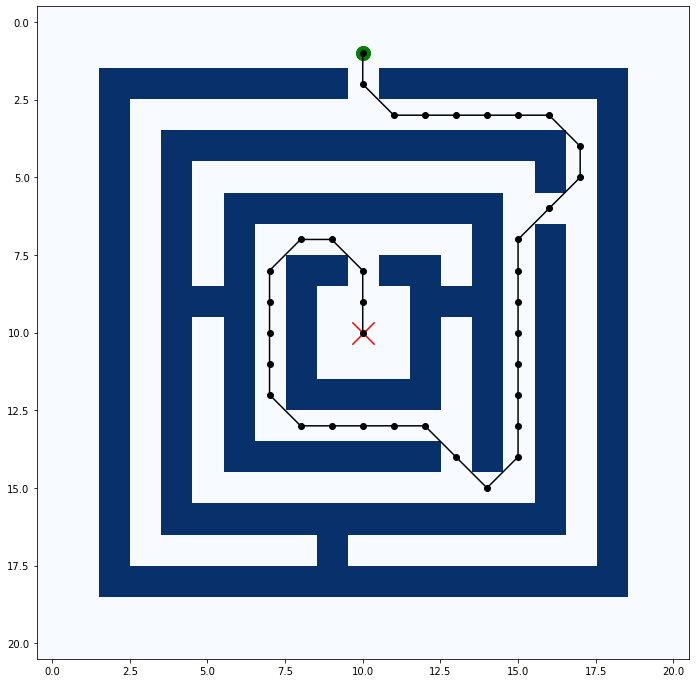

In [14]:
#extract x and y coordinates from route list
x_coords = []
y_coords = []

for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Blues)
ax.scatter(start[1],start[0], marker = "o", color = "green", s = 200)
ax.scatter(goal[1],goal[0], marker = "x", color = "red", s = 500)
ax.plot(y_coords,x_coords, marker = "o", color = "black")
plt.show()